In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.utils import to_categorical

In [23]:
fashion_train_df = pd.read_csv('/content/drive/MyDrive/DL assignment/fashion_minst/fashion-mnist_train.csv', sep=',')
fashion_test_df = pd.read_csv('/content/drive/MyDrive/DL assignment/fashion_minst/fashion-mnist_test.csv', sep=',')

In [24]:
fashion_train_df.shape   # Shape of the dataset

(60000, 785)

In [25]:
fashion_train_df.columns   # Name of the columns of the DataSet.

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [26]:
print(set(fashion_train_df['label']))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


So we have 10 different lables. from 0 to 9. 

Now lets find out what is the min and max of values of in the other columns.

In [27]:
print([fashion_train_df.drop(labels='label', axis=1).min(axis=1).min(), 
      fashion_train_df.drop(labels='label', axis=1).max(axis=1).max()])

[0, 255]


So we have 0 to 255 which is the color values for grayscale. 0 being white and 255 being black.

Now lets check some of the rows in tabular format

In [28]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So evry other things of the test dataset are going to be the same as the train dataset except the shape.

In [29]:
fashion_test_df.shape

(10000, 785)

So here we have 10000 images instead of 60000 as in the train dataset.

Lets check first few rows.

In [30]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


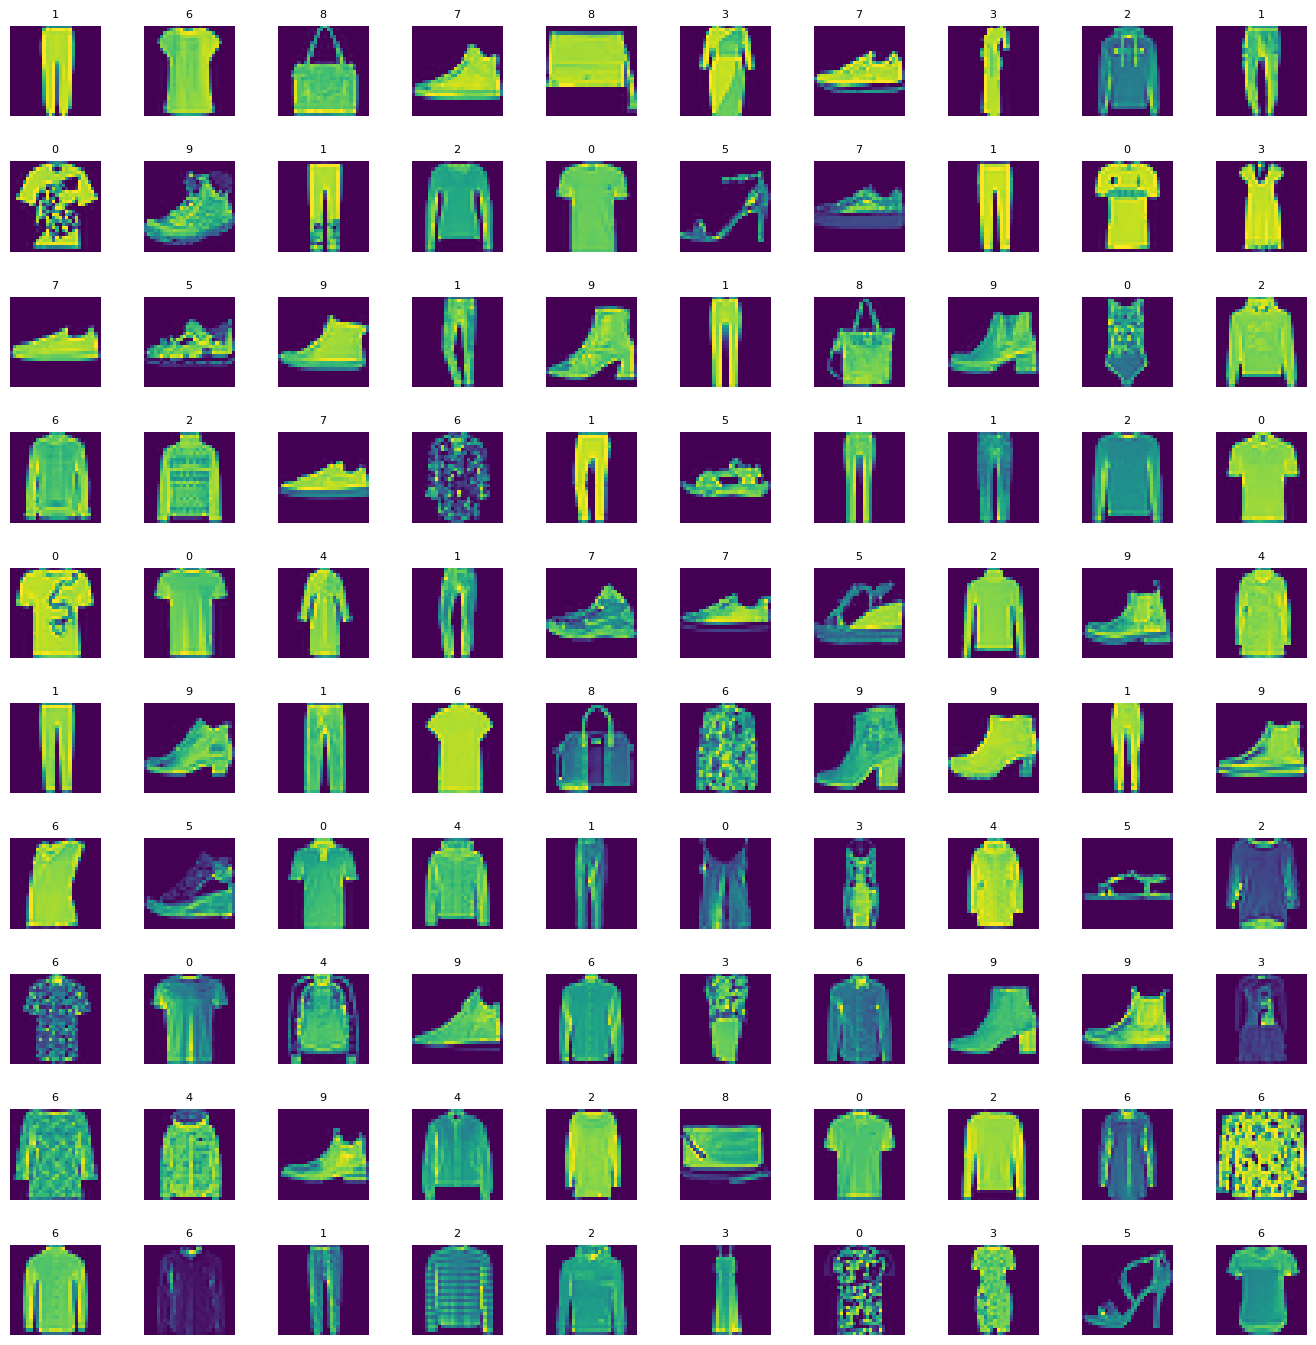

In [31]:
training = np.asarray(fashion_train_df, dtype='float32')

height = 10
width = 10

fig, axes = plt.subplots(nrows=width, ncols=height, figsize=(17,17))
axes = axes.ravel()  # this flattens the 15x15 matrix into 225
n_train = len(training)

for i in range(0, height*width):
    index = np.random.randint(0, n_train)
    axes[i].imshow(training[index, 1:].reshape(28,28))
    axes[i].set_title(int(training[index, 0]), fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.5)

In [32]:
training = np.asarray(fashion_train_df, dtype='float32')
X_train = training[:, 1:].reshape([-1,28,28,1])
X_train = X_train/255   
y_train = training[:, 0]

testing = np.asarray(fashion_test_df, dtype='float32')
X_test = testing[:, 1:].reshape([-1,28,28,1])
X_test = X_test/255    
y_test = testing[:, 0]

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=5)    # TODO : change the random state to 5

In [34]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (10000, 28, 28, 1)
(48000,) (12000,) (10000,)


In [35]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(rate=0.3))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=32, activation='relu'))
cnn_model.add(Dense(units=10, activation='sigmoid'))

**compile the model**

In [36]:
cnn_model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                346144    
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                      

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


**Train the model**

In [18]:
cnn_model.fit(x=X_train, y=y_train, batch_size=512, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
75/75 [==============================] - 43s 558ms/step - loss: 0.7757 - accuracy: 0.7431 - val_loss: 0.4993 - val_accuracy: 0.8257
Epoch 2/50
75/75 [==============================] - 43s 574ms/step - loss: 0.4481 - accuracy: 0.8412 - val_loss: 0.4090 - val_accuracy: 0.8540
Epoch 3/50
75/75 [==============================] - 43s 572ms/step - loss: 0.3890 - accuracy: 0.8623 - val_loss: 0.3727 - val_accuracy: 0.8669
Epoch 4/50
75/75 [==============================] - 41s 548ms/step - loss: 0.3552 - accuracy: 0.8757 - val_loss: 0.3537 - val_accuracy: 0.8747
Epoch 5/50
75/75 [==============================] - 40s 536ms/step - loss: 0.3347 - accuracy: 0.8844 - val_loss: 0.3255 - val_accuracy: 0.8840
Epoch 6/50
75/75 [==============================] - 48s 634ms/step - loss: 0.3209 - accuracy: 0.8876 - val_loss: 0.3180 - val_accuracy: 0.8865
Epoch 7/50
75/75 [==============================] - 43s 565ms/step - loss: 0.3052 - accuracy: 0.8910 - val_loss: 0.3055 - val_accuracy: 0.8928

In [19]:
eval_result = cnn_model.evaluate(X_test, y_test)
print("Accuracy : {:.3f}".format(eval_result[1]))

313/313 [==============================] - 3s 8ms/step - loss: 0.2561 - accuracy: 0.9200
Accuracy : 0.920


In [20]:
y_pred = cnn_model.predict_classes(x=X_test)

AttributeError: ignored

In [ ]:
height = 10
width = 10

fig, axes = plt.subplots(nrows=width, ncols=height, figsize=(20,20))
axes = axes.ravel()
for i in range(0, height*width):
    index = np.random.randint(len(y_pred))
    axes[i].imshow(X_test[index].reshape((28,28)))
    axes[i].set_title("True Class : {:0.0f}\nPrediction : {:d}".format(y_test[index],y_pred[index]))
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.9, wspace=0.5)

NameError: ignored

Error in callback <function flush_figures at 0x7f6404634280> (for post_execute):


KeyboardInterrupt: ignored

**Plot Confusin Matrix**

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sbn.heatmap(cm, annot=True)

**Classification Report**

In [ ]:
num_classes = 10
class_names = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(y_test, y_pred, target_names=class_names)
print(cr)